## An치lisis - Bundesliga temporada 2015/2016 (masculina)

Vamos a hacer un an치lisis de las distintas competiciones (las cinco grandes ligas durante la temporada 2015-2016 y de todos los partidos en general) para poder entender que caracter칤sticas son m치s importantes a la hora de tomar la decisi칩n por parte del modelo de ML para decidir si el equipo va a ganar, perder o empatar el partido.

En este notebook en cuesti칩n, vamos a analizar la Bundesliga en la temporada 2015/2016 (masculina).

Cargamos los datos de los partidos sobre la competici칩n para entrenar el modelo y poder hacer el estudio de explicabilidad.

In [1]:
import os
import pandas as pd


competition_name = "1. Bundesliga"
competition_gender = "male"
season_name = "2015/2016"
season_name_for_filename = "2015_2016"

output_dir = "data/reduced/"
filename = f"{competition_name}({season_name_for_filename}_{competition_gender})_reduced.csv"
output_path = os.path.join(output_dir, filename)

if os.path.exists(output_path):
    print(f"Matches from the competition loaded from {output_path}")
    matches_in_Bundesliga = pd.read_csv(output_path)
else:
    print("You don't have data from the competition yet. Please run the notebook '0_datasets_building.ipynb' first.")

Matches from the competition loaded from data/reduced/1. Bundesliga(2015_2016_male)_reduced.csv


In [2]:
matches_in_Bundesliga.head(5)

match_id  shots_on_target_ratio_home  shots_on_target_ratio_away  \
0   3890267                    0.375000                    0.461538   
1   3890265                    0.150000                    0.272727   
2   3890264                    0.133333                    0.312500   
3   3890263                    0.272727                    0.357143   
4   3890262                    0.272727                    0.357143   

   average_shots_on_target_distance_home  \
0                              16.622853   
1                              20.255117   
2                              26.271612   
3                              18.619963   
4                              20.860604   

   average_shots_on_target_distance_away  shots_inside_area_ratio_home  \
0                              13.820947                      0.750000   
1                              17.607160                      0.500000   
2                              17.542449                      0.333333   
3                              21.381858                      0.454545   
4                              15.628223                      0.818182   

   shots_inside_area_ratio_away  pass_success_ratio_home  \
0                      0.692308                 0.832013   
1                      0.545455                 0.772727   
2                      0.500000                 0.767241   
3                      0.428571                 0.688000   
4                      0.428571                 0.490909   

   pass_success_ratio_away  cross_success_ratio_home  ...  \
0                 0.755051                  0.250000  ...   
1                 0.828261                  0.318182  ...   
2                 0.704301                  0.200000  ...   
3                 0.620690                  0.214286  ...   
4                 0.657431                  0.300000  ...   

   percentage_shots_under_pressure_home  \
0                              0.250000   
1                              0.769231   
2                              0.500000   
3                              0.444444   
4                              0.222222   

   percentage_shots_inside_area_under_pressure_home  \
0                                          0.400000   
1                                          0.750000   
2                                          0.400000   
3                                          0.571429   
4                                          0.250000   

   percentage_passes_under_pressure_home  \
0                               0.574713   
1                               0.441718   
2                               0.595376   
3                               0.502924   
4                               0.375000   

   percentage_passes_inside_area_under_pressure_home  \
0                                               0.50   
1                                               0.75   
2                                               1.00   
3                                               0.50   
4                                               0.60   

   percentage_set_piece_shots_home  \
0                         0.266667   
1                         0.680000   
2                         0.476190   
3                         0.458333   
4                         0.400000   

   percentage_set_piece_shots_inside_area_home  percentage_substitutions_home  \
0                                     0.300000                            0.5   
1                                     0.727273                            0.5   
2                                     0.500000                            0.5   
3                                     0.454545                            0.5   
4                                     0.600000                            0.5   

   percentage_tactical_substitutions_home  percentage_tactical_changes_home  \
0                                     0.5                          0.500000   
1                                     0.5                          0.500

Una vez ya tenemos los datos cargados, entrenamos el mejor modelo (seleccionado tras la experimentaci칩n) y mostramos sus resultados.

In [3]:
from src.analysis import bundesliga_best_model

best_model_Bundesliga, evaluation_metrics, X_train_Bundesliga, X_test_Bundesliga, encoder_Bundesliga, match_ids_test = bundesliga_best_model(matches_in_Bundesliga)
print(f"The best model for Bundesliga is {best_model_Bundesliga}")
print(f"The evaluation metrics for the best model are:")
evaluation_metrics.head()

The best model for Bundesliga is RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, max_features=None, n_estimators=11,
                       random_state=42)
The evaluation metrics for the best model are:


Train Accuracy  Test Accuracy  Precision Macro  \
Random Forest        0.868852        0.66129         0.652339   

               Precision Weighted  Recall Macro  Recall Weighted  F1 Macro  \
Random Forest            0.677773      0.642593          0.66129   0.64054   

               F1 Weighted  
Random Forest       0.6634

Una vez ya tenemos el mejor modelo entrenado comenzamos el an치lisis de explicabilidad.

### Estudio global

Vamos a comenzar por un estudio global. 

En este caso, al ser el mejor modelo Random Forest, nos basaremos en la importancia de las caracter칤sticas proporcionada por el modelo a trav칠s del m칠todo `feature_importances_`.
- A diferencia de la regresi칩n log칤stica, que asigna coeficientes espec칤ficos a cada clase, Random Forest eval칰a la relevancia de cada variable para el modelo en su conjunto, sin distinguir entre clases.
- Este modelo captura tanto relaciones lineales como no lineales, permitiendo analizar interacciones entre m칰ltiples factores y su impacto en la predicci칩n del resultado.
- Sin embargo, no indica la direcci칩n del efecto de cada caracter칤stica (positiva o negativa), sino 칰nicamente su importancia relativa en el rendimiento del modelo.

El gr치fico presentado a continuaci칩n muestra la importancia global de cada caracter칤stica en la predicci칩n de los resultados de los partidos en la Bundesliga.
- Valores m치s altos indican que una caracter칤stica tiene mayor peso en las predicciones del modelo.
- Valores cercanos a cero indican que la caracter칤stica no aporta informaci칩n significativa para la clasificaci칩n del resultado.

Este an치lisis nos permite identificar qu칠 factores son clave en la predicci칩n del resultado de los partidos, considerando relaciones m치s complejas y capturando patrones que un modelo lineal no podr칤a detectar.

Features with zero importance across all classes:
['pass_success_ratio_away', 'tackles_success_ratio_home', 'tackles_success_ratio_away', 'possession_percentage_away', 'is_valid_last_3_matches_form_home', 'win_rate_last_5_matches_home', 'is_valid_win_rate_last_5_matches_home', 'win_last_home_match_home_team', 'is_valid_win_last_home_match_home_team', 'win_last_away_match_away_team', 'is_valid_win_last_away_match_away_team', 'is_valid_goals_conceded_last_match_home', 'goals_conceded_last_match_away', 'is_valid_goals_conceded_last_match_away', 'goals_scored_last_match_home', 'is_valid_goals_scored_last_match_home', 'goals_scored_last_match_away', 'is_valid_goals_scored_last_match_away', 'is_valid_std_shots_last_3_matches_home', 'is_valid_std_shots_last_3_matches_away', 'percentage_shots_foot_home', 'percentage_shots_head_home', 'percentage_shots_other_home', 'percentage_recoveries_home', 'percentage_50_50_won_home', 'percentage_penaltys_committed_home', 'percentage_red_cards_home', 'perc

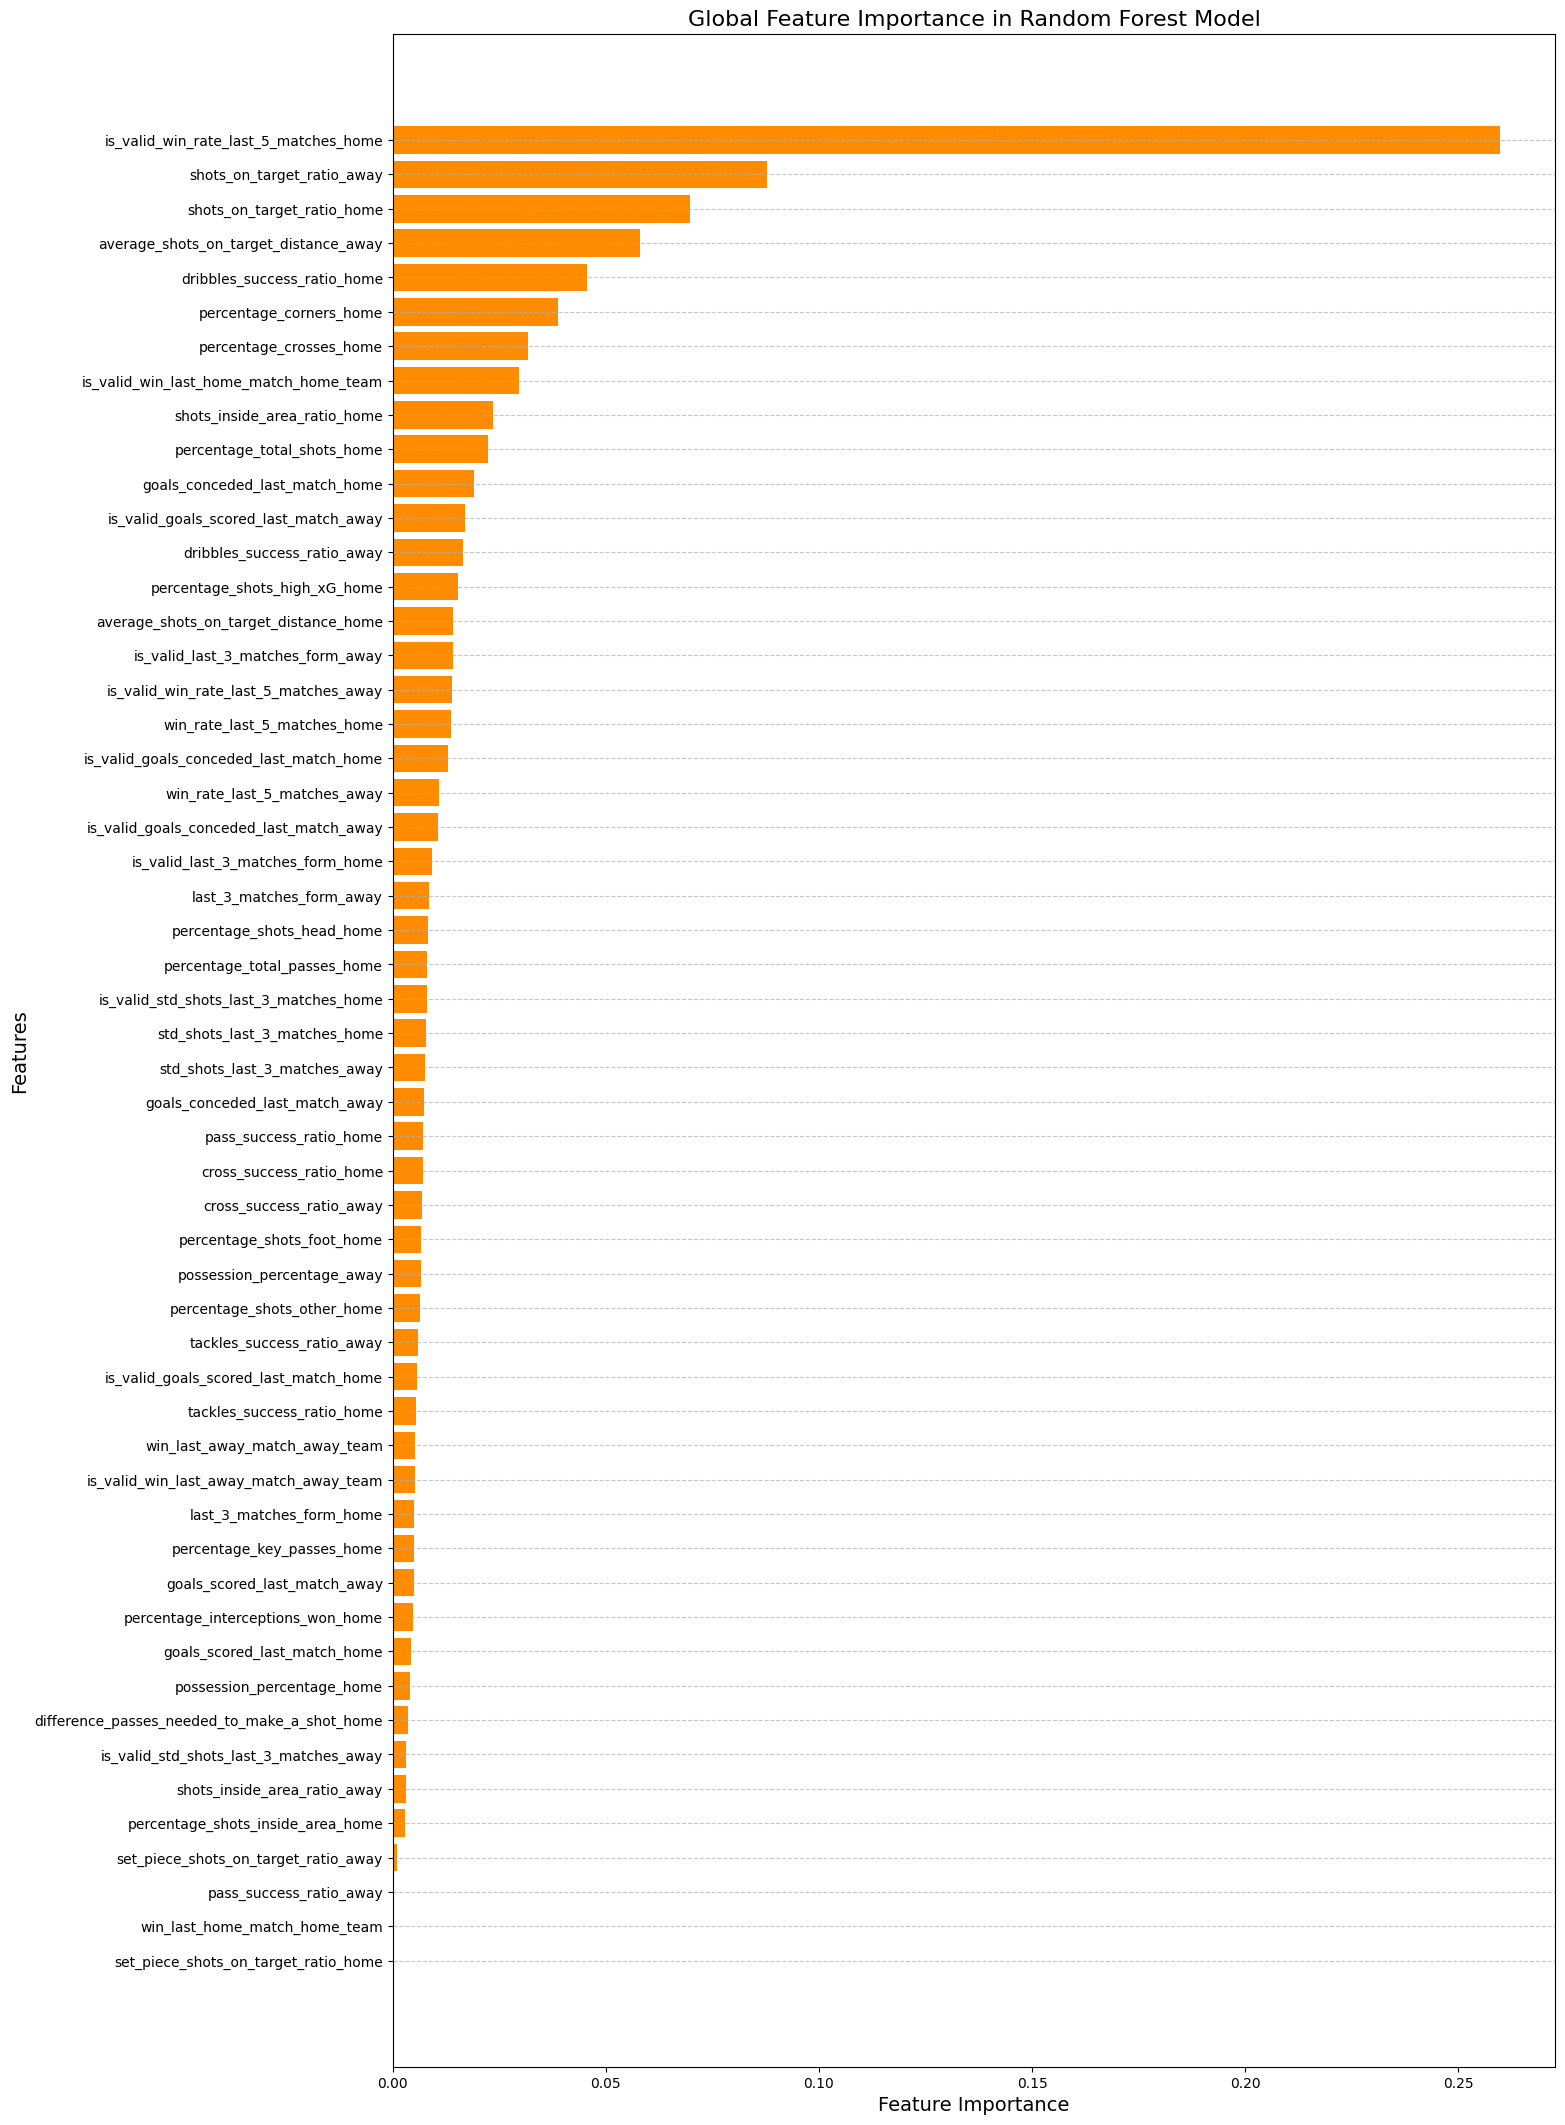

In [4]:
from src.analysis import random_forest_global_analysis

random_forest_global_analysis(best_model_Bundesliga)

El modelo Random Forest ha determinado la relevancia de cada caracter칤stica en la predicci칩n del resultado de los partidos en la Bundesliga. A diferencia de la Regresi칩n Log칤stica, aqu칤 se mide la importancia relativa de cada variable para el modelo en su conjunto, sin distinguir entre clases espec칤ficas (victoria local, empate o victoria visitante). Vamos a analizar el gr치fico:

- **Caracter칤siticas m치s importantes en la predicci칩n**: Las caracter칤sticas con mayor importancia en el modelo son aquellas que han tenido un impacto significativo en la clasificaci칩n del resultado del partido. Aunque no podemos determinar si una variable favorece a un equipo u otro, s칤 podemos intuir que estas caracter칤sticas han sido relevantes en la toma de decisiones del modelo.
    - `is_valid_win_rate_last_5_matches_home`: La validez del rendimiento reciente del equipo local es la caracter칤stica m치s influyente en la predicci칩n del modelo. Esto sugiere que la forma en la que el equipo ha jugado en sus 칰ltimos cinco partidos ha sido un patr칩n relevante en la determinaci칩n de los resultados.
    - `shots_on_target_ratio_away` y `shots_on_target_ratio_home`: La precisi칩n en los disparos a puerta del equipo local y del visitante son unas de las m칠tricas m치s destacadas. Esto sugiere que la capacidad del equipo local o visitante para generar tiros precisos ha sido un aspecto clave en los partidos analizados.
    - `average_shots_on_target_distance_home` y `average_shots_on_target_distance_away`: La distancia promedio desde la que el equipo local o visitante realiza sus tiros a puerta tambi칠n ha sido una variable relevante. Esto podr칤a indicar que los equipos que intentan disparos desde distancias m치s cortas o largas han mostrado ciertos patrones que el modelo ha identificado como significativos.
    - `dribbles_success_ratio_home`, `dribbles_success_ratio_home`: El 칠xito en los regates del equipo local ha sido una caracter칤stica importante. Esto sugiere que la capacidad del equipo para superar defensas mediante el regate ha tenido un impacto en los resultados de los partidos analizados.
    - `percentage_corners_home` y `percentage_crosses_home`: El n칰mero de saques de esquina y la frecuencia de centros han sido considerados aspectos relevantes por el modelo. Esto podr칤a indicar que los equipos que generan m치s jugadas ofensivas desde las bandas han tenido un impacto en la predicci칩n del resultado.
    - `is_valid_win_last_home_match_home_team`: La validez del 칰ltimo partido en casa del equipo local ha sido una variable destacada. Esto sugiere que la forma reciente en su estadio puede estar relacionada con los patrones de victoria o desempe침o del equipo.
    - `shots_inside_area_ratio_home`: La proporci칩n de tiros dentro del 치rea del equipo local es otro de los factores importantes en la clasificaci칩n del modelo. Los disparos dentro del 치rea suelen estar asociados con una mayor probabilidad de gol, lo que podr칤a explicar su relevancia en la predicci칩n.
    - `percentage_total_shots_home`: El volumen total de disparos del equipo local tambi칠n ha sido una m칠trica destacada. Esto sugiere que la cantidad de intentos ofensivos puede estar vinculada a los patrones que el modelo ha identificado como influyentes en los partidos.
    - `goals_conceded_last_match_home`: La cantidad de goles concedidos por el equipo local en su 칰ltimo partido ha sido una caracter칤stica relevante. Esto podr칤a indicar que la solidez defensiva reciente ha sido un factor tenido en cuenta en la clasificaci칩n del modelo.
    - `is_valid_goals_scored_last_match_away`: La validez de los goles anotados por el equipo visitante en su 칰ltimo partido toma importancia en la clasificaci칩n del modelo. Esto sugiere que la forma reciente ofensiva del equipo visitante es importantes a la hora de que el modelo tome una decisi칩n.
    - `percentage_shots_high_xG_home`: Los tiros con una alta probabilidad de gol por parte de los equipos es una m칠trica destacada. Esto sugiere que el porcentaje de anotar goles en los tiros por parte de ambos equipo toma importancia a la hora de tener que clasificar el resultado del partido.
    - `win_rate_last_5_matches_home` y :`win_rate_last_5_matches_away` El rendimiento reciente del equipo local y visitante ha sido identificado como un factor relevante. Esto indica que los resultados obtenidos en los 칰ltimos encuentros han tenido una relaci칩n con el desenlace de los partidos en la competici칩n.
    - `percentage_shots_head_home`: El porcentaje de tiros de cabeza de los equipos en el partido parece identificarse como una m칠trica relevante a la hora de tomar una decisi칩n en la clasificaci칩n del resultado de partido por parte del modelo.
    - `percentage_total_passes_home`: El porcentaje de pases de ambos equipos en el partido tambi칠n se considera una m칠trica relevante para tomar una decisi칩n acerca de la clasificaci칩n del resultado del partido por parte del modelo.

- **Caracter칤sticas sin importancia en la predicci칩n**: El modelo ha determinado que varias caracter칤sticas no aportan informaci칩n relevante en la clasificaci칩n del resultado del partido. Esto no significa que estas variables no tengan influencia en el f칰tbol en la Bundesliga, sino que, dentro de los datos analizados, el modelo no ha encontrado una relaci칩n clara con los resultados.
   - **Factores relacionados con el rendimiento reciente**: M칠tricas como `win_last_home_match_home_team`, `win_last_away_match_away_team` y `goals_scored_last_match_home` han sido consideradas irrelevantes en la predicci칩n. Esto indica que, aunque el rendimiento pasado de un equipo es un aspecto importante en el an치lisis futbol칤stico, el modelo no ha encontrado una relaci칩n clara entre estos factores y el resultado final del partido.
    - **Estad칤sticas defensivas y disciplinares**: 
        - El modelo ha descartado m칠tricas defensivas como `tackles_success_ratio_home`, `tackles_success_ratio_away`, `percentage_recoveries_home` y `percentage_shots_inside_area_under_pressure_home`. Esto sugiere que estos factores no han mostrado una correlaci칩n fuerte con los resultados de los partidos en la Bundesliga.
        - Asimismo, m칠tricas relacionadas con la disciplina, como `percentage_red_cards_home`, `percentage_penaltys_committed_home` y `percentage_yellow_cards_home`, no han sido consideradas relevantes en la predicci칩n del modelo. Esto podr칤a indicar que las expulsiones y las faltas, aunque son eventos que pueden cambiar el curso de un partido, no han mostrado un patr칩n consistente en los datos analizados.
    - **M칠tricas del estilo de juego**: Es bastante impactante como m칠tricas como `difference_passes_needed_to_make_a_shot_home`, `possession_percentage_home` y `possession_percentage_away` toman tan poca relevancia en la predicci칩n del resultado, siendo m칠tricas que expresan el estilo de juego de los equipos del partido.
    - **M칠tricas ofensivas**: ALgunas m칠tricas como `shots_inside_area_ratio_away`, `set_piece_shots_on_target_ratio_home`, `set_piece_shots_on_target_ratio_away` o `percentage_shots_inside_area_ratio_home` toman poca importancia a la hora de clasificar el resultado por parte del modelo.
    - **Otros factores t치cticos y de juego**: El modelo tambi칠n ha descartado variables como `percentage_tactical_substitutions_home`, `percentage_pressures_home` y `percentage_passes_under_pressure_home`, lo que sugiere que estos factores t치cticos no han sido determinantes en la clasificaci칩n del resultado del partido.

**Conclusiones generales**: 

El modelo Random Forest ha identificado que los factores m치s influyentes en la predicci칩n del resultado en la Bundesliga est치n relacionados con la eficiencia ofensiva, la generaci칩n de oportunidades y el rendimiento reciente de los equipos. En particular, la precisi칩n en los tiros a puerta, el volumen de disparos y la forma reciente del equipo han sido los indicadores clave en la clasificaci칩n del resultado del partido.

Por otro lado, aspectos tradicionalmente considerados fundamentales en el an치lisis futbol칤stico, como la posesi칩n del bal칩n, los tackles defensivos o la disciplina en el juego, no han mostrado una correlaci칩n clara con los resultados. Esto sugiere que en la Bundesliga, la victoria no est치 necesariamente vinculada a la posesi칩n o la solidez defensiva, sino a la efectividad en la generaci칩n y finalizaci칩n de oportunidades.

El hecho de que m칠tricas relacionadas con el juego por bandas y las jugadas a bal칩n parado hayan sido relevantes sugiere que estas estrategias pueden desempe침ar un papel importante en la Bundesliga. Los equipos que logran generar oportunidades a trav칠s de centros y saques de esquina parecen haber influido en los resultados de los partidos.

Finalmente, es importante recordar que aunque ciertas caracter칤sticas han sido identificadas como m치s importantes que otras, el modelo no indica en qu칠 direcci칩n afectan el resultado. Es decir, aunque una variable como shots_on_target_ratio_away sea relevante, no podemos determinar si su aumento favorece m치s a los equipos visitantes o si simplemente es un factor clave en la din치mica de los partidos de la Bundesliga.

En conclusi칩n, este an치lisis nos proporciona una visi칩n clara de qu칠 aspectos han sido m치s utilizados en la clasificaci칩n de los partidos de la Bundesliga y nos ayuda a comprender mejor cu치les son los patrones m치s influyentes en la competici칩n, ofreciendo una base s칩lida para el an치lisis de partidos en el f칰tbol alem치n.

### Estudio local

Ahora comenzamos el an치lisis de explicabilidad utilizando SHAP. 

El an치lisis SHAP (SHapley Additive exPlanations) nos permite interpretar el impacto de cada caracter칤stica en la predicci칩n del modelo. A diferencia de los coeficientes lineales, SHAP captura interacciones entre variables y muestra el impacto individual de cada una en cada predicci칩n. En este documento analizaremos los resultados obtenidos para la predicci칩n de los partidos de la Bundesliga.

Cada uno de los siguientes gr치ficos representa la importancia de las variables en la predicci칩n de cada posible resultado:
- Victoria del equipo visitante (away_team).
- Empate (draw).
- Victoria del equipo local (home_team).

**Interpretaci칩n de los gr치ficos SHAP**: Cada punto en el gr치fico representa un partido. Los valores en el eje X indican el impacto de una caracter칤stica espec칤fica en la predicci칩n del modelo:
- Valores positivos: Incrementan la probabilidad de que el partido termine con el resultado indicado.
- Valores negativos: Disminuyen la probabilidad del resultado.
- Color: Representa el valor de la caracter칤stica. Rojo indica valores altos y azul valores bajos.

In [5]:
from src.analysis import compute_shap_values

feature_names_Bundesliga = list(best_model_Bundesliga.feature_names_in_)
shap_values_Bundesliga = compute_shap_values(best_model_Bundesliga, X_train_Bundesliga, X_test_Bundesliga, feature_names_Bundesliga)

Class 0: away_team
Important features (30):
['shots_on_target_ratio_home', 'shots_on_target_ratio_away', 'average_shots_on_target_distance_home', 'average_shots_on_target_distance_away', 'shots_inside_area_ratio_home', 'dribbles_success_ratio_away', 'set_piece_shots_on_target_ratio_home', 'set_piece_shots_on_target_ratio_away', 'last_3_matches_form_away', 'std_shots_last_3_matches_home', 'percentage_total_shots_home', 'percentage_shots_high_xG_home', 'percentage_shots_inside_area_home', 'percentage_total_passes_home', 'difference_passes_needed_to_make_a_shot_home', 'percentage_interceptions_won_home', 'percentage_blocks_home', 'percentage_duels_won_home', 'percentage_tackles_home', 'percentage_clearance_home', 'percentage_key_errors_home', 'percentage_miscontrols_home', 'percentage_yellow_cards_home', 'percentage_pressures_in_attacking_third_home', 'percentage_dribbles_home', 'percentage_dispossessed_home', 'percentage_set_piece_shots_home', 'percentage_substitutions_home', 'percentage

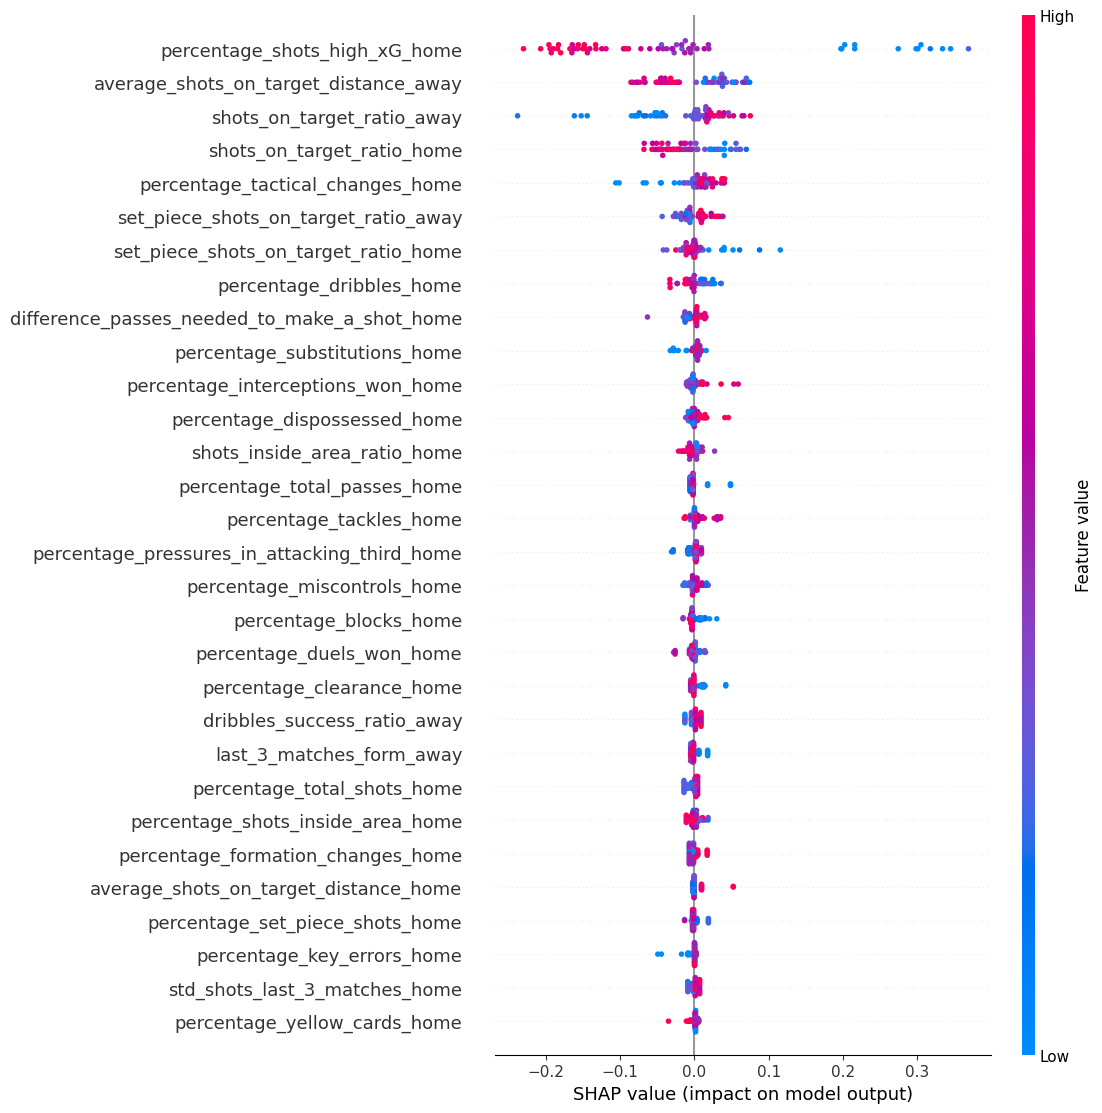

Class 1: draw
Important features (34):
['shots_on_target_ratio_home', 'shots_on_target_ratio_away', 'average_shots_on_target_distance_home', 'average_shots_on_target_distance_away', 'shots_inside_area_ratio_home', 'cross_success_ratio_away', 'dribbles_success_ratio_home', 'dribbles_success_ratio_away', 'set_piece_shots_on_target_ratio_home', 'set_piece_shots_on_target_ratio_away', 'last_3_matches_form_away', 'goals_conceded_last_match_home', 'std_shots_last_3_matches_home', 'std_shots_last_3_matches_away', 'percentage_total_shots_home', 'percentage_shots_high_xG_home', 'percentage_shots_inside_area_home', 'percentage_total_passes_home', 'difference_passes_needed_to_make_a_shot_home', 'percentage_interceptions_won_home', 'percentage_blocks_home', 'percentage_tackles_home', 'percentage_clearance_home', 'percentage_miscontrols_home', 'percentage_pressures_in_attacking_third_home', 'percentage_offsides_home', 'percentage_dribbles_home', 'percentage_dispossessed_home', 'percentage_recoverie

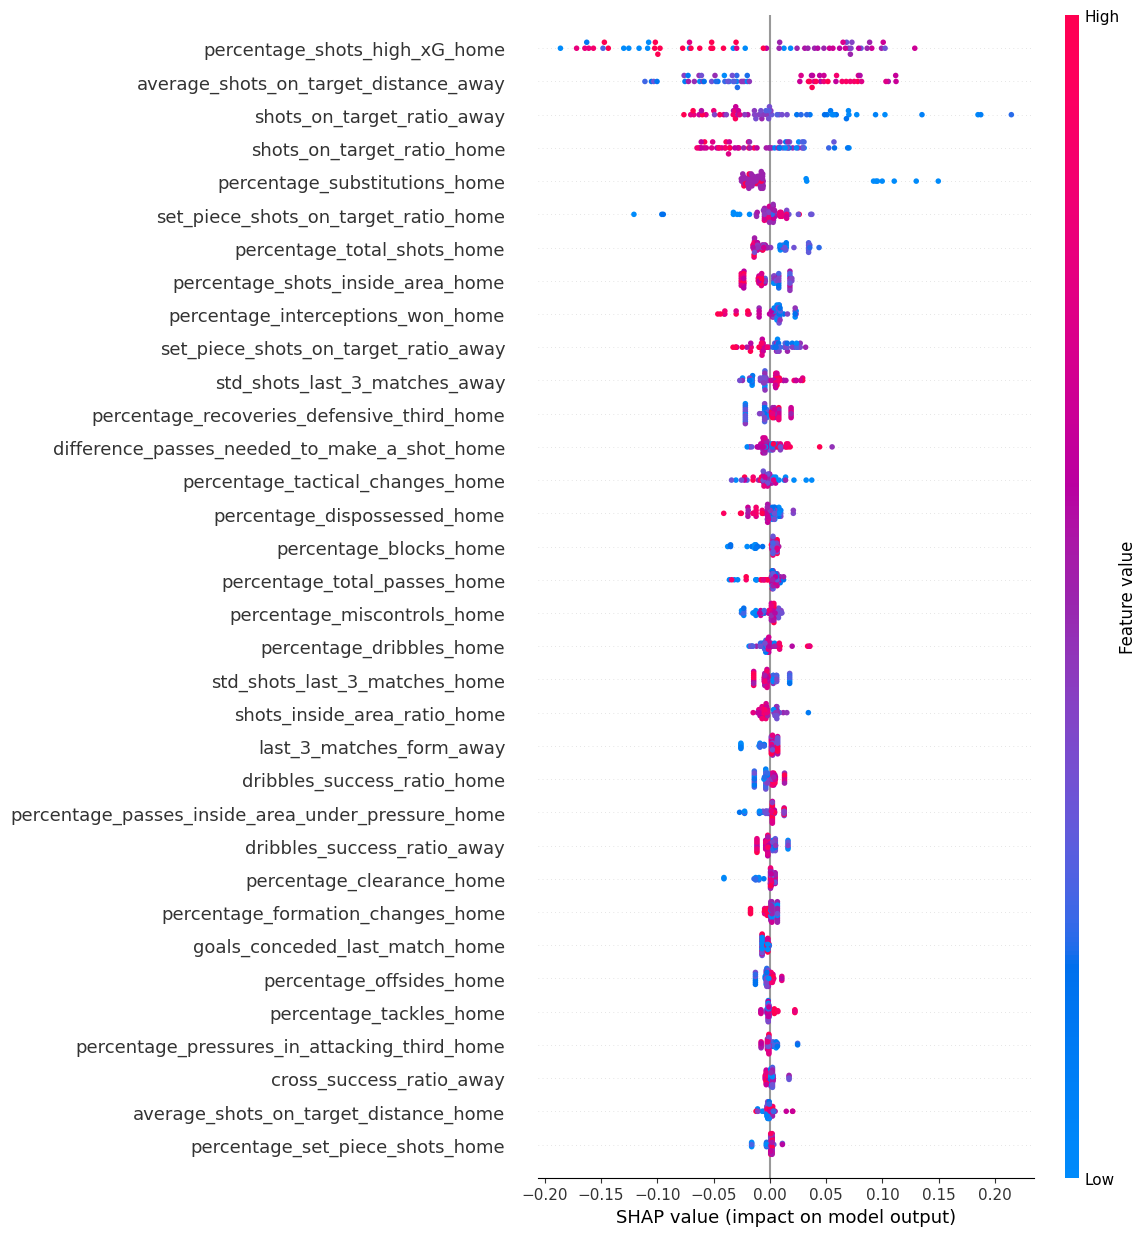

Class 2: home_team
Important features (30):
['shots_on_target_ratio_home', 'shots_on_target_ratio_away', 'average_shots_on_target_distance_home', 'average_shots_on_target_distance_away', 'shots_inside_area_ratio_home', 'dribbles_success_ratio_home', 'set_piece_shots_on_target_ratio_home', 'set_piece_shots_on_target_ratio_away', 'goals_conceded_last_match_home', 'std_shots_last_3_matches_home', 'std_shots_last_3_matches_away', 'percentage_total_shots_home', 'percentage_shots_high_xG_home', 'percentage_shots_inside_area_home', 'percentage_total_passes_home', 'difference_passes_needed_to_make_a_shot_home', 'percentage_interceptions_won_home', 'percentage_blocks_home', 'percentage_duels_won_home', 'percentage_tackles_home', 'percentage_miscontrols_home', 'percentage_yellow_cards_home', 'percentage_counterpress_home', 'percentage_offsides_home', 'percentage_dribbles_home', 'percentage_dispossessed_home', 'percentage_recoveries_defensive_third_home', 'percentage_passes_inside_area_under_pres

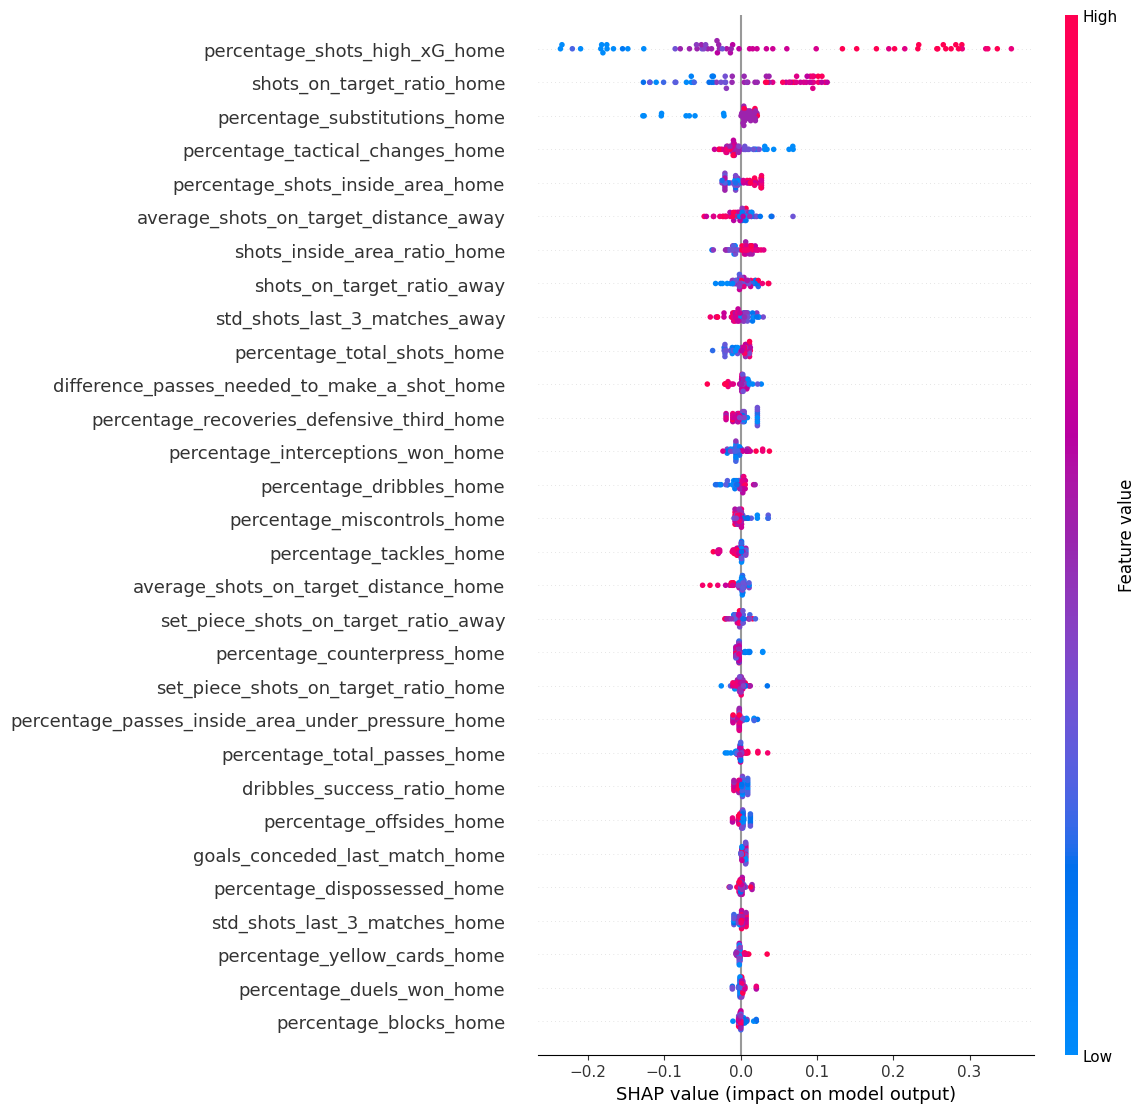

In [6]:
from src.analysis import plot_shap_summary

plot_shap_summary(shap_values_Bundesliga, feature_names_Bundesliga, encoder_Bundesliga, threshold=0.003)

Vamos a analizar cada uno de los gr치ficos:

- **Victoria del equipo visitante**: Este gr치fico muestra las caracter칤sticas que favorecen o disminuyen la probabilidad de victoria del equipo visitante en la Bundesliga.
    - **Caracter칤sticas que favorecen la victoria del equipo visitante**: 游늳
        - `shots_on_target_ratio_away`: Un equipo visitante con un alto porcentaje de tiros a puerta indica que es m치s efectivo en ataque, lo que aumenta sus posibilidades de anotar y ganar el partido.
        - `percentage_tactical_changes_home`: Si el equipo local hace muchas modificaciones t치cticas, puede ser una se침al de que est치 siendo superado, beneficiando al equipo visitante.
        - `set_piece_shots_on_target_ratio_away`: Si el equipo visitante tiene una alta precisi칩n en tiros a bal칩n parado, puede aprovechar estas situaciones para marcar goles clave.
        - `difference_passes_needed_to_make_a_shot_home`: Si el equipo local necesita m치s pases para generar un disparo, su ataque es menos directo y menos efectivo en comparaci칩n con el visitante.
        - `percentage_interceptions_won_home`: Si el equipo local tiene un n칰mero alto de intercepciones, puede significar que est치 recuperando el bal칩n en zonas no ofensivas, sin generar suficiente peligro.
        - `percentage_dispossessed_home`: Si el equipo local pierde la posesi칩n con frecuencia, le otorga m치s oportunidades de ataque al visitante.
        - `dribbles_success_ratio_away`: Un equipo visitante con mayor 칠xito en regates indica que es capaz de romper l칤neas defensivas y generar oportunidades de gol.
        - `percentage_formation_changes_home`: Si el equipo local cambia m치s veces de formaci칩n que el equipo visitante puede indicar que esta vi칠ndose superado y que quiere cambiar la din치mica del partido lo que aumentan las opciones de que gane el equipo visitante.
        - `average_shots_on_target_distance_home`: Si el equipo local realiza sus tiros desde lejos, disminuye la calidad de sus oportunidades, favoreciendo al equipo visitante.
    - **Caracter칤sticas que no favorecen la victoria del equipo visitante**: 游늴
        - `percentage_shots_high_xG_home`: Si el equipo local genera muchas oportunidades de alta expectativa de gol (xG), es m치s probable que convierta y haga dif칤cil la victoria visitante.
        - `average_shots_on_target_distance_away`: Si el equipo visitante realiza sus tiros desde lejos, disminuye la calidad de sus oportunidades, desfavoreciendo las opciones de que el equipo visitante gane el partido.
        - `shots_on_target_ratio_home`: Un equipo local con una alta precisi칩n en tiros a puerta genera m치s peligro y reduce las opciones de victoria del visitante.
        - `set_piece_shots_on_target_ratio_home`: Si el equipo local es efectivo en jugadas a bal칩n parado, puede generar peligro y reducir las opciones del visitante de ganar.
        - `percentage_dribbles_home`: Si el equipo local intenta m치s regates que el equipo visitante indica que esta atacando m치s e intentando superar la l칤nea defensiva del equipo visitante, dismunyendo as칤 las opciones de ganar del equipo visitante.
        - `shots_inside_area_ratio_home`: Un equipo local que dispara con frecuencia dentro del 치rea tiene m치s posibilidades de anotar, dificultando el triunfo visitante.
        - `percentage_clearance_home`: Un equipo local que realiza muchos despejes efectivos impide que el equipo visitante tenga oportunidades de finalizar jugadas en ataque.
        - `percentage_blocks_home`: Si el equipo local bloquea muchos tiros, est치 reduciendo la efectividad ofensiva del visitante.
        - `percentage_shots_inside_area_home`: Si el equipo local realiza m치s tiros que el equipo visitante desde dentro del 치rea en el partido, disminuyen las opciones del equipo visitante de ganar el partido.
    - **Conclusi칩n**: La victoria del equipo visitante en la Bundesliga est치 influenciada principalmente por su efectividad ofensiva y la inestabilidad del equipo local. Un equipo visitante con un alto porcentaje de tiros a puerta, precisi칩n en jugadas a bal칩n parado y 칠xito en regates tiene mayores probabilidades de imponerse. Adem치s, si el equipo local realiza constantes cambios t치cticos o de formaci칩n, pierde la posesi칩n con frecuencia y necesita demasiados pases para generar oportunidades de gol, la ventaja se inclina hacia el equipo visitante. Sin embargo, la victoria visitante se ve amenazada cuando el equipo local es eficaz en la finalizaci칩n, especialmente cuando genera oportunidades de alta expectativa de gol (xG), dispara con frecuencia dentro del 치rea y tiene precisi칩n en sus tiros a bal칩n parado. Adem치s, si el equipo local es s칩lido en defensa, bloquea tiros y despeja con 칠xito, complica las opciones del visitante de convertir goles. Tambi칠n, si el visitante realiza sus disparos desde lejos, la calidad de sus oportunidades disminuye y su probabilidad de ganar se reduce.

- **Empate**: Este gr치fico muestra las caracter칤sticas que favorecen o disminuyen la probabilidad de empate en un partido en la Bundesliga. El empate en un partido se ve influenciado por el equilibrio entre ambos equipos en aspectos ofensivos, defensivos y de control del juego.
    - **Caracter칤sticas que favorecen el empate**: 游늳
        - `percentage_shots_high_xG_home`: Cuando el procentaje de tiros con alta probabilidad de gol es un valor cercano al 50%, aumentan las opciones de empate ya que los valores extremos significan que uno de los dos equipos ha tenido m치s tiros de este estilo mientras que si es un valor cercano al 50% indica igualdad en este tipo de tiros.
        - `average_shots_on_target_distance_away`: Si el equipo visitante realiza sus tiros desde lejos, disminuye la calidad de sus oportunidades, favoreciendo el empate.
        - `std_shots_last_3_matches_away`: Si el equipo visitante tiene una desviaci칩n alta de tiros en los 칰ltimos tres partido significa que no viene teniendo un rendimineto regular lo que hace aumentar las opciones de que el partido quede en empate.
        - `percentage_recoveries_defensive_third_home`: Si el equipo local recupera muchos balones en su propio tercio, significa que su defensa est치 funcionando bien y evita que el equipo visitante genere muchas ocasiones claras.
        - `percentage_blocks_home`: Un equipo local que bloquea muchos tiros reduce la efectividad ofensiva del equipo visitante, dificultando la posibilidad de que uno de los dos equipos se imponga.
        - `percentage_miscontrols_home`: Si el equipo local tiene un n칰mero elevado de errores en el control del bal칩n, puede significar un partido con muchas p칠rdidas de posesi칩n, sin un dominio claro de ning칰n equipo.
        - `last_3_matches_form_away`: Si el equipo visitante no viene con una mala forma de los 3 partidos pasados hace que pueda reaccionar en el partido si se ve por dentr치s aumentando as칤 sus opciones de empatar el partido.
        - `percentage_clearance_home`: Si el equipo local realiza un alto n칰mero de despejes, puede estar evitando situaciones de peligro en su 치rea, lo que impide que el equipo visitante marque y mantiene el marcador equilibrado.
        - `percentage_tackles_home`: Si el equipo rival realiza m치s tackles que el equipo visitante, puede estar evitando que el equipo visitante imponga su juego lo que hace que el marcador se mantenga equilibrado.
    - **Caracter칤sticas que no favorecen el empate**: 游늴
        - `percentage_shots_high_xG_home`: Si el equipo local o visitante genera disparos con alta expectativa de gol (xG), es m치s probable que convierta sus oportunidades y rompa el empate.
        - `shots_on_target_ratio_home` y `shots_on_target_ratio_away`: Un equipo con un alto porcentaje de tiros a puerta est치 generando m치s peligro y tiene m치s probabilidades de marcar, reduciendo la posibilidad de un empate.
        - `percentage_substitutions_home`: Un equipo local que realiza varias sustituciones puede deberse a que quiere mantener el ritmo del partido, desfavoreciendo de esta manera el empate.
        - `percentage_total_shots_home`: Si el equipo local tiene un alto porcentaje de tiros a puerta aumentan sus opciones de ganar el partido, disminuyendo as칤 las opciones de empate.
        - `percentage_shots_inside_area_home`: Si el equipo local realiza muchos tiros desde dentro del 치rea, disminuyen las opciones de empate.
        - `percentage_interceptions_won_home_team`: Si el equipo local gana varios balones a partir de intercepciones hace indicar su buen nivel defensivo en el partido, aumentando as칤 sus opciones de imponer si juego y ganar el partido.
        - `set_piece_shots_on_target_ratio_away`: Si el equipo visitante tiene una alta precisi칩n en tiros a bal칩n parado, puede aprovechar estas situaciones para marcar goles claves, reduciendo as칤 las opciones de empate.
        - `percentage_dispossessed_home`: Si el equipo local pierde la posesi칩n con frecuencia, le otorga m치s oportunidades de ataque al visitante.
        - `shots_inside_area_ratio_home`: Si el equipo local realiza gran parte de sus tiros desde dentro del 치rea, disminuyen las opciones de que ocurra un empate en el partido.
        - `dribbles_success_ratio_away`: Un equipo visitante con mayor 칠xito en regates indica que es capaz de romper l칤neas defensivas y generar oportunidades de gol.
        - `percentage_formation_changes_home`: Si el equipo local cambia m치s veces de formaci칩n que el equipo visitante puede indicar que esta vi칠ndose superado y que quiere cambiar la din치mica del partido lo que aumentan las opciones de que gane el equipo visitante.
    - **Conclusi칩n**: El empate en la Bundesliga se ve favorecido cuando ambos equipos muestran un equilibrio en su desempe침o, sin una dominancia clara en el ataque o la defensa. Factores como una distribuci칩n equilibrada de los tiros con alta expectativa de gol, la recuperaci칩n efectiva del bal칩n en zonas defensivas y la cantidad de despejes y bloqueos del equipo local contribuyen a un partido con menos goles y m치s propenso a terminar en empate. Adem치s, cuando el equipo visitante no tiene un rendimiento constante en los 칰ltimos partidos o cuando el equipo local comete errores en el control del bal칩n, la posibilidad de que el partido se mantenga parejo aumenta. Por otro lado, el empate se vuelve menos probable cuando uno de los equipos genera m치s peligro en ataque. Un alto porcentaje de tiros a puerta, una alta efectividad en jugadas a bal칩n parado y una mayor cantidad de tiros dentro del 치rea aumentan las probabilidades de que uno de los equipos se imponga en el marcador. Adem치s, si el equipo local realiza muchas sustituciones o cambios de formaci칩n, puede indicar que est치 intentando revertir una situaci칩n adversa, lo que puede llevar a un desenlace m치s inclinado hacia una victoria.

- **Victoria del equipo local**: Este gr치fico muestra las caracter칤sticas que favorecen o disminuyen la probabilidad de victoria del equipo local en la Bundesliga.
    - **Caracter칤sticas que favorecen la victoria del equipo local**: 游늳
        - `percentage_shots_high_xG_home`: Si los tiros del equipo local tienen un alto "expected goal" (xG), significa que est치 generando oportunidades de alta calidad, lo que incrementa sus posibilidades de marcar.
        - `shots_on_target_ratio_home`: Un alto porcentaje de tiros a puerta del equipo local indica que est치 generando ocasiones claras de gol y aumenta sus probabilidades de anotar y ganar el partido.
        - `percentage_substitutions_home`: Un equipo local que realiza varias sustituciones puede deberse a que quiere mantener el ritmo del partido, favoreciendo de esta manera su victoria.
        - `shots_inside_area_ratio_home` y `percentage_shots_inside_area_home`: Un equipo local que dispara con frecuencia dentro del 치rea genera ocasiones m치s peligrosas y tiene m치s probabilidades de convertir goles.
        - `percentage_interceptions_won_home`: Un equipo local que gana m치s intercepciones est치 cortando los ataques rivales y evitando que el visitante progrese con facilidad.
        - `percentage_dribbles_home`: Si el equipo local intenta m치s regates que el equipo visitante indica que esta atacando m치s e intentando superar la l칤nea defensiva del equipo visitante, aumentando as칤 las opciones de ganar del equipo local.
        - `percentage_total_passes_home`: Si el equipo local realiza m치s pases que el equipo rival aumentando sus opciones de ganar el partido ya que indica que lleva el control del partido.
        - `percentage_duels_won_home`: Un equipo que gana m치s duelos f칤sicos en el partido demuestra superioridad en el aspecto f칤sico y en la lucha por la posesi칩n, lo que suele traducirse en un mejor control del juego.
    - **Caracter칤sticas que no favorecen la victoria del equipo local**: 游늴
        - `percentage_tactical_changes_home`: Si el equipo local hace muchas modificaciones t치cticas, puede ser una se침al de que est치 siendo superado, beneficiando al equipo visitante.
        - `shots_on_target_ratio_away`: Si el equipo visitante tiene un alto porcentaje de tiros a puerta, significa que est치 generando peligro y reduciendo las opciones del equipo local de ganar el partido.
        - `std_shots_last_3_matches_away`: Si el equipo visitante tiene una desviaci칩n alta de tiros en los 칰ltimos tres partido significa que no viene teniendo un rendimineto regular lo que hace aumentar las opciones de que el partido quede en empate.
        - `difference_passes_needed_to_make_a_shot_home`: Si el equipo local necesita m치s pases para generar un disparo, su ataque es menos directo y menos efectivo en comparaci칩n con el visitante.
        - `average_shots_on_target_distance_home`: Si el equipo local realiza sus tiros desde lejos, disminuye la calidad de sus oportunidades y as칤 sus opciones de ganar el partido.
        - `percentage_miscontrols_home`: Si el equipo local tiene un n칰mero elevado de errores en el control del bal칩n, puede significar un partido con muchas p칠rdidas de posesi칩n, sin un dominio claro de ning칰n equipo.
        - `percentage_offsides_home`: Si el equipo local cae mucho en fuera de juego puede indicar que no esta sabiendo como atacar al equipo rival haciendo de esta manera que disminuyan sus opciones de ganar el partido.
    - **Conclusi칩n**: La victoria del equipo local en la Bundesliga est치 determinada por una combinaci칩n de factores ofensivos, defensivos y de control del partido. Un equipo que genera oportunidades de alta calidad, con tiros dentro del 치rea y una alta tasa de tiros a puerta, tiene mayores probabilidades de imponerse en el marcador. Adem치s, un equipo local que domina en la posesi칩n del bal칩n, gana m치s duelos f칤sicos e intercepta los ataques rivales muestra una superioridad en el juego que suele traducirse en un mejor rendimiento. Factores como los regates exitosos y las sustituciones estrat칠gicas pueden indicar un equipo ofensivamente activo y con capacidad de adaptaci칩n a las necesidades del partido. Sin embargo, ciertas variables pueden reducir las opciones de victoria del equipo local. Un equipo que necesita demasiados pases para generar un disparo tiende a ser menos directo y eficiente en ataque, lo que favorece a su rival. Adem치s, un equipo que realiza muchos cambios t치cticos puede estar mostrando inseguridad en su planteamiento, algo que el equipo visitante podr칤a aprovechar. Otros factores como la alta efectividad en los tiros del equipo visitante, errores en el control del bal칩n y una frecuencia elevada de fueras de juego tambi칠n pueden indicar debilidades que dificultan la victoria del equipo local.

- **Conclusiones generales**:
    - *Victoria del equipo visitante*: La victoria del equipo visitante en la Bundesliga est치 influenciada principalmente por su capacidad ofensiva y la inestabilidad t치ctica del equipo local. Equipos visitantes con alta efectividad en sus tiros, 칠xito en regates y precisi칩n en jugadas a bal칩n parado tienen una ventaja considerable. Adem치s, si el equipo local realiza cambios t치cticos frecuentes, pierde la posesi칩n con facilidad o necesita demasiados pases para generar peligro, el visitante tiene m치s posibilidades de imponerse. Sin embargo, si el equipo local es s칩lido en defensa, bloquea tiros y genera oportunidades de alta expectativa de gol (xG), la victoria visitante se complica, especialmente si el equipo visitante depende de tiros lejanos, que reducen la calidad de sus oportunidades.
    - *Empate*: El empate en la Bundesliga se da en situaciones donde ninguno de los equipos logra imponerse claramente, ya sea en el aspecto ofensivo o defensivo. Factores como la distribuci칩n equitativa de tiros con alta expectativa de gol, la capacidad del equipo local para recuperar balones en zonas defensivas y una gran cantidad de despejes y bloqueos hacen que el partido tenga menos oportunidades de goles y termine en empate. Adem치s, cuando el equipo visitante ha sido irregular en sus 칰ltimos partidos o el equipo local comete errores en el control del bal칩n, la probabilidad de un resultado igualado aumenta. No obstante, el empate es menos probable cuando un equipo genera m치s peligro con tiros a puerta precisos, tiene 칠xito en jugadas a bal칩n parado o domina la posesi칩n con efectividad.
    - *Victoria del equipo local*: La victoria del equipo local se construye sobre una combinaci칩n de ataque efectivo, dominio del juego y solidez defensiva. Un equipo local que genera muchas oportunidades de calidad dentro del 치rea, con alta precisi칩n en los tiros y control del bal칩n, tiene m치s probabilidades de ganar. La superioridad en duelos f칤sicos, la precisi칩n en regates y la capacidad para interceptar los ataques rivales tambi칠n son claves para imponerse en el partido. Sin embargo, si el equipo local presenta debilidades como falta de efectividad en el ataque, una dependencia excesiva de cambios t치cticos o una alta cantidad de fueras de juego y errores en el control del bal칩n, su probabilidad de victoria disminuye. Adem치s, si el equipo visitante logra generar ocasiones peligrosas y tiene una defensa organizada, la ventaja del equipo local puede verse reducida.
    - *Factores no determinantes*: Existen factores que no son completamente determinantes para definir el resultado del partido, ya que su impacto puede depender de la situaci칩n espec칤fica de cada encuentro. Por ejemplo, el n칰mero de pases realizados por un equipo puede indicar control del juego, pero si no se traduce en oportunidades claras, no garantiza una victoria. De igual manera, la cantidad de tiros realizados no siempre es un indicador de 칠xito si estos son de baja calidad. Otro aspecto es la cantidad de faltas o tarjetas, que pueden afectar el rendimiento de un equipo, pero no siempre influyen de manera directa en el marcador final. En general, es el equilibrio entre ataque, defensa y toma de decisiones t치cticas lo que finalmente define el resultado del partido en la Bundesliga.